## Energy spectrum of graphene nanoflakes

This example demonstrates the setup of a basic simulation. We will initialize a triangular graphene nanoflake, specify the couplings, obtain the energy spectrum, and investigate the eigenstates.

### Set up the StackBuilder

Building is a stack is done with the help of an eponymous StackBuilder. We first set up an empty instance.

In [8]:
import granad
sb = granad.StackBuilder()

We want to model

1. a *triangular* flake of 7.4 Å (0.74 nm)
2. with an *armchair* edge type, which is
3. made from graphene, i.e. a honeycomb lattice with a lattice constant of 2.46 Å.

Step 1 specifies a concrete shape, while steps 2 and 3 define a concrete lattice. For this reason, GRANAD separates the process of defining such a flake via helper classes. First, we need the concrete shape. 

In [9]:
triangle = granad.Triangle(7.4) 

Now, we need the lattice.

In [10]:
graphene = granad.Lattice(
    shape=triangle,
    lattice_type=granad.LatticeType.HONEYCOMB,
    lattice_edge=granad.LatticeEdge.ARMCHAIR,
    lattice_constant=2.46,
)

Now, we visualize.

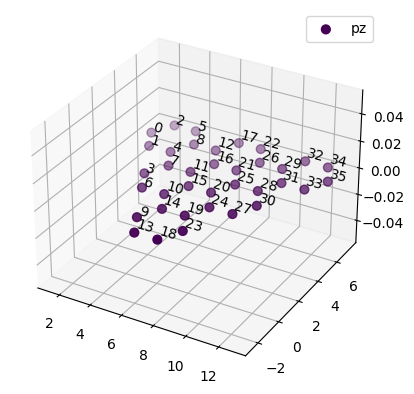

In [11]:
sb.add("pz", graphene)
sb.show3D()

Now, we define the couplings. GRANAD knows two types of couplings: hopping and Coulomb parameters. GRANAD offers coupling classes tailored to either lattice materials, single spots or a combination of both. Since we are investigating a lattice structure, we use the following code to set the onsite hopping between pz-Orbitals to 0 eV and the nearest-neighbor hopping to -2.66 eV.

In [12]:
hopping_graphene = granad.LatticeCoupling(
    orbital_id1="pz", orbital_id2="pz", lattice=graphene, couplings=[0, -2.66] # list of hopping amplitudes like [onsite, nn, ...]
)
sb.set_hopping(hopping_graphene)

For Coulomb couplings, we use the following procedures

1. For onsite, nearest neighbour, next-to-nearest neighbour hoppings we use the values 16.522, 8.64, 5.333
2. For neigbours further apart, we use the classical law 14.399 / r

To this end, we use the following code.

In [13]:
coulomb_graphene = granad.LatticeCoupling(
    orbital_id1="pz",
    orbital_id2="pz",
    lattice=graphene,
    couplings=[16.522, 8.64, 5.333],
    coupling_function=lambda d: 14.399 / d + 0j,
)
sb.set_coulomb(coulomb_graphene)

### Set up the Stack

The StackBuilder is the high-level representation of the setup. For numerical simulations, we need a Stack instance.

In [14]:
stack = sb.get_stack()

Now, we can visualize IP quantities

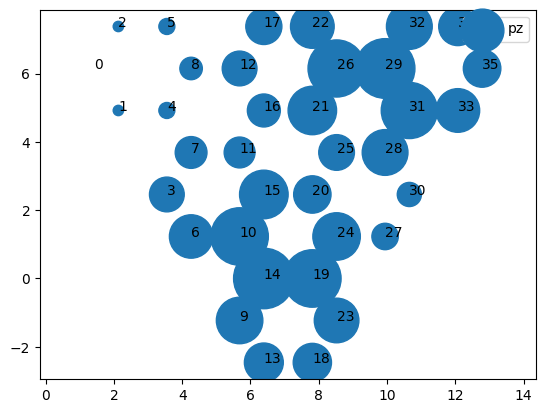

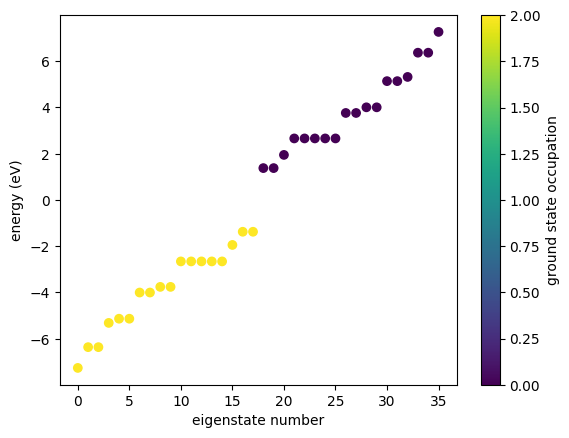

In [15]:
# visualize the first "excited state"
granad.show_eigenstate2D(stack, show_state=1)

# visualize the energy spectrum
granad.show_energies(stack)